**AIDS-Practical-7**

Yash Rahate

In [ ]:
import pandas as pd
df = pd.read_csv('aug_train.csv')

print(df.head())
print(df.describe())
print(df.info())

       id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  167647    Male   22                1          7.0                   1   
1   17163    Male   42                1         28.0                   0   
2   32023  Female   66                1         33.0                   0   
3   87447  Female   22                1         33.0                   0   
4  501933    Male   28                1         46.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    < 1 Year             No          2630.0                 152.0       16   
1    1-2 Year            Yes         43327.0                  26.0      135   
2    1-2 Year            Yes         35841.0                 124.0      253   
3    < 1 Year             No         27645.0                 152.0       69   
4    < 1 Year             No         29023.0                 152.0      211   

   Response  
0         0  
1         0  
2         0  
3         0 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [ ]:
print(df.columns)


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Drop rows with missing values
df = df.dropna()

# Select features for clustering (excluding target variable 'Response')
features = ['Age', 'Annual_Premium', 'Vintage', 'Gender', 'Region_Code',
            'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

# Create a copy of the selected features
X = df[features].copy()

# Handle categorical columns: Label Encoding for 'Gender', 'Vehicle_Age', 'Vehicle_Damage'
label_encoder = LabelEncoder()

# Encode categorical columns
X['Gender'] = label_encoder.fit_transform(X['Gender'])  # Male -> 1, Female -> 0
X['Vehicle_Age'] = label_encoder.fit_transform(X['Vehicle_Age'])  # e.g., "< 1 Year" -> 0, "1-2 Year" -> 1
X['Vehicle_Damage'] = label_encoder.fit_transform(X['Vehicle_Damage'])  # Yes -> 1, No -> 0

# Standardize the data (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for visualization (reducing to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")




Explained variance ratio: [0.28560471 0.15037109]


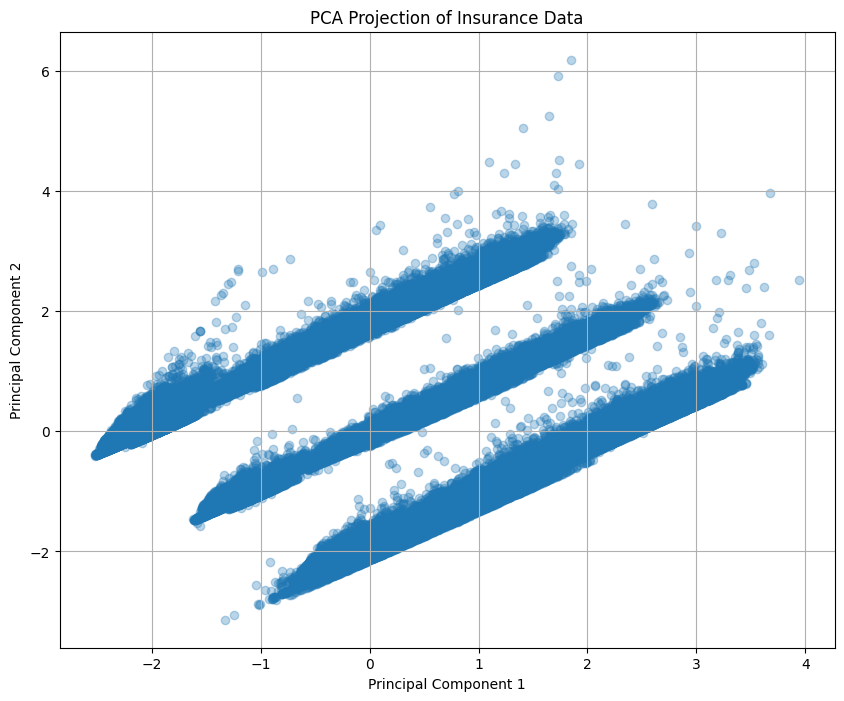

In [ ]:
# Create a DataFrame for the PCA results for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Plot the PCA projection
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.3)
plt.title('PCA Projection of Insurance Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Determine optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 7, 1)

# Use a sample for silhouette score to speed things up
sample_size = 10000
if X_scaled.shape[0] > sample_size:
    X_sample = X_scaled[np.random.choice(X_scaled.shape[0], sample_size, replace=False)]
else:
    X_sample = X_scaled

for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=2048, max_iter=100, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    # Silhouette score (using sample)
    silhouette_scores.append(silhouette_score(X_sample, kmeans.predict(X_sample)))


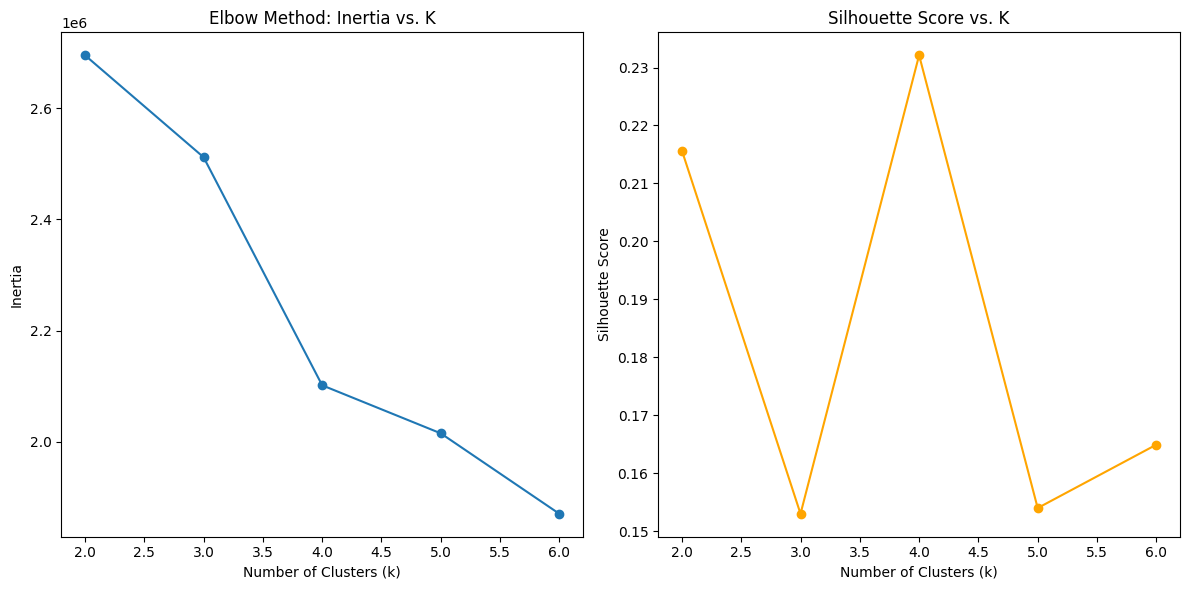

In [ ]:

# Plot Inertia (Elbow Method)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method: Inertia vs. K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


1. Based on the provided Elbow Method and Silhouette Score plots, I would recommend setting optimal_k = 2.

2. Looking at the Elbow Method (left graph), there's a clear "bend" at k=2, after which the rate of inertia decrease slows down. While the inertia continues to decrease as k increases (which is expected), the most significant drop is at k=2.

3. More importantly, the Silhouette Score (right graph) reaches its maximum value at k=2 (approximately 0.24), then drops significantly for k=3 and continues declining. The Silhouette Score measures how well-separated the clusters are, with higher values indicating better cluster definition. Since k=2 has the highest Silhouette Score, it suggests that 2 clusters provide the most distinct grouping for this dataset.

Therefore, optimal_k = 2 would be the best choice based on these evaluation metrics.

In [ ]:
# Apply K-means with the optimal number of clusters
# Let's choose k=2 based on the elbow method
optimal_k = 2
kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, n_init=10, batch_size=2048, max_iter=100)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

# Create PCA DataFrame if you haven't already
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Add cluster labels to the PCA DataFrame
pca_df['KMeans_Cluster'] = kmeans_labels


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


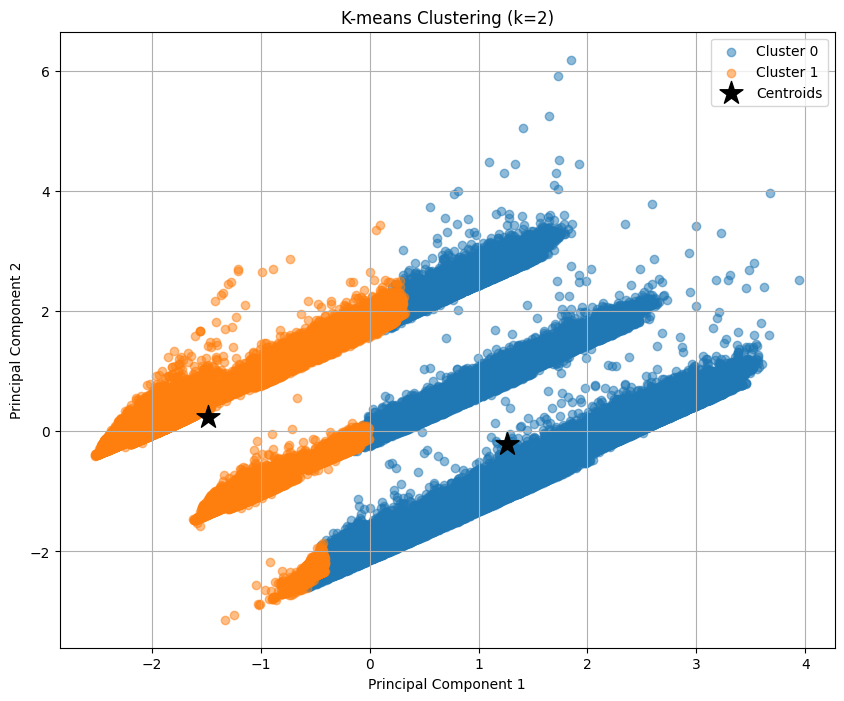

In [ ]:
# Plot the clusters on the PCA projection
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = pca_df[pca_df['KMeans_Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.5)

# Plot centroids in PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, marker='*', c='black', label='Centroids')

plt.title(f'K-means Clustering (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Add cluster labels to the original DataFrame
cluster_analysis = df.copy()
cluster_analysis['KMeans_Cluster'] = kmeans_labels

# Encode 'Gender' and 'Vehicle_Damage' for numerical summary
cluster_analysis['Gender'] = cluster_analysis['Gender'].map({'Male': 1, 'Female': 0})
cluster_analysis['Vehicle_Damage'] = cluster_analysis['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

# Group by cluster and take the mean of selected features
kmeans_cluster_summary = cluster_analysis.groupby('KMeans_Cluster').mean(numeric_only=True)

print("\nK-means Cluster Analysis:")
print(kmeans_cluster_summary[['Age', 'Annual_Premium', 'Response', 'Gender', 'Previously_Insured', 'Vehicle_Damage']])



K-means Cluster Analysis:
                      Age  Annual_Premium  Response    Gender  \
KMeans_Cluster                                                  
0               46.091162    31408.311249  0.289634  0.627285   
1               28.997285    29829.203186  0.004588  0.425039   

                Previously_Insured  Vehicle_Damage  
KMeans_Cluster                                      
0                         0.151537        0.821035  
1                         0.916455        0.049737  


In [ ]:
#---------------------------
# 2. DBSCAN Clustering
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Sample the data for speed (if large)
sample_size = 10000
if X_scaled.shape[0] > sample_size:
    X_sample = X_scaled[np.random.choice(X_scaled.shape[0], sample_size, replace=False)]
else:
    X_sample = X_scaled

# Use Manhattan distance (L1 norm)
neighbors = NearestNeighbors(n_neighbors=10, metric='manhattan')
neighbors_fit = neighbors.fit(X_sample)
distances, indices = neighbors_fit.kneighbors(X_sample)

# Sort the distances to the 10th nearest neighbor
distances = np.sort(distances[:, -1])

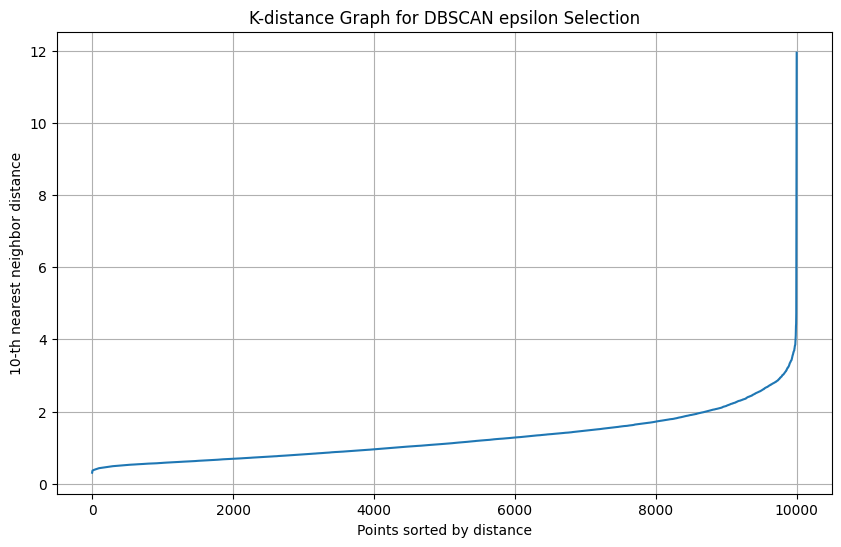

In [ ]:
# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN epsilon Selection')
plt.xlabel('Points sorted by distance')
plt.ylabel('10-th nearest neighbor distance')
plt.grid(True)
plt.show()

Based on the K-distance graph for DBSCAN epsilon selection, we should choose an epsilon value where there's a clear "elbow" or significant change in the k-distance curve.

Looking at this plot, there's a gradual increase in the 10th-nearest neighbor distance for most points, but there's a dramatic spike at the far right end of the graph. The optimal epsilon typically occurs at the point where this "knee" or bend appears in the curve.

For this dataset, I would recommend choosing an epsilon value around 0.7 to 0.8. This is approximately where the curve starts to bend upward more noticeably before the extreme spike at the end. This location represents a good balance between:

1. Being large enough to form meaningful clusters (not too many noise points)
2. Being small enough to not merge distinct clusters together

The points at the far right of the graph (with very high distance values) likely represent outliers or noise points that are far from any cluster. By setting epsilon in the 0.7-0.8 range, you'll create reasonably dense clusters while appropriately identifying these distant points as noise.

If you choose a much smaller epsilon (like 0.1), you'll have many noise points and very small clusters. If you choose a much larger epsilon (like 1.0), you risk merging distinct clusters together.

In [ ]:
# Based on the k-distance plot, choose an appropriate epsilon
# Let's use eps=0.7 and min_samples=10
dbscan = DBSCAN(eps=0.7, min_samples=10, metric='manhattan')
dbscan_labels = dbscan.fit_predict(X_scaled)

In [ ]:
# Count number of clusters (excluding noise points with label -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"\nNumber of DBSCAN clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {list(dbscan_labels).count(-1)}")


Number of DBSCAN clusters: 176
Number of noise points: 28005


In [ ]:

# Add DBSCAN labels to the PCA DataFrame
pca_df['DBSCAN_Cluster'] = dbscan_labels

# Plot the DBSCAN clusters on the PCA projection
plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

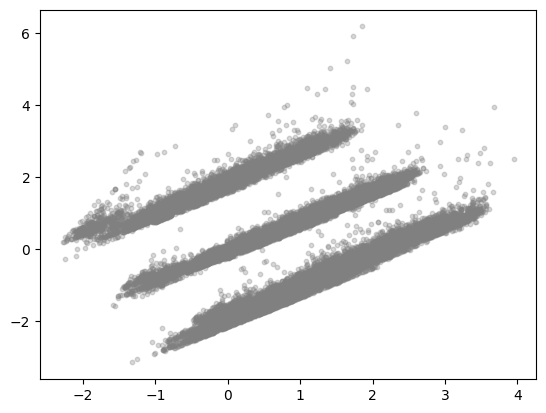

In [ ]:
# Plot noise points
noise = pca_df[pca_df['DBSCAN_Cluster'] == -1]
plt.scatter(noise['PCA1'], noise['PCA2'], color='gray', label='Noise', alpha=0.3, s=10)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


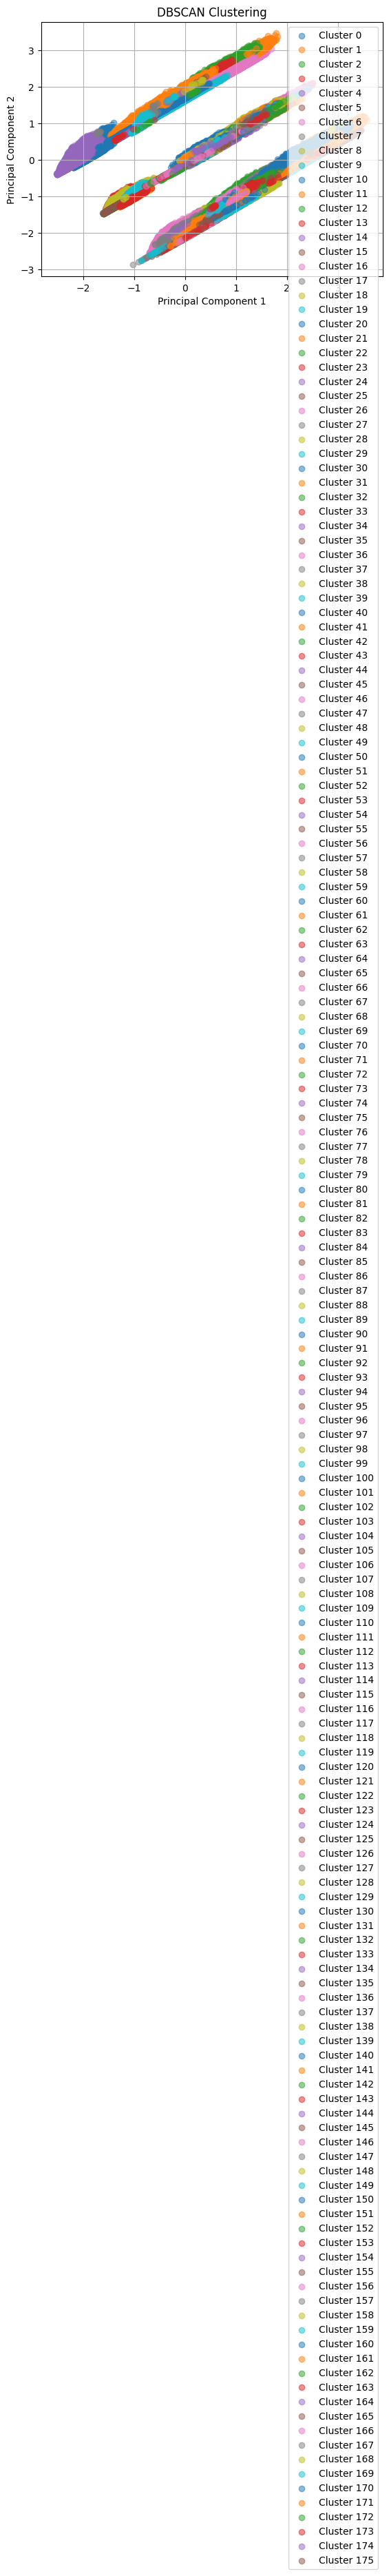

In [ ]:
# Plot clusters
unique_clusters = set(dbscan_labels)
unique_clusters.discard(-1)  # Remove noise label
for cluster in unique_clusters:
    cluster_data = pca_df[pca_df['DBSCAN_Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.5)

plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# First, convert the categorical columns ('Gender', 'Vehicle_Damage', etc.) to numeric values
cluster_analysis['Gender'] = cluster_analysis['Gender'].map({'Male': 1, 'Female': 0})
cluster_analysis['Vehicle_Damage'] = cluster_analysis['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

# Ensure that DBSCAN labels are added as a new column
cluster_analysis['DBSCAN_Cluster'] = dbscan_labels

# Select only numeric columns for the mean calculation
numeric_columns = cluster_analysis.select_dtypes(include=[np.number]).columns

# Group by DBSCAN cluster and calculate the mean for numeric columns
dbscan_cluster_summary = cluster_analysis.groupby('DBSCAN_Cluster')[numeric_columns].mean()

# Display the summary
print("\nDBSCAN Cluster Analysis:")
print(dbscan_cluster_summary[['Age', 'Annual_Premium', 'Response', 'Gender', 'Previously_Insured', 'Vehicle_Damage']])



DBSCAN Cluster Analysis:
                      Age  Annual_Premium  Response  Gender  \
DBSCAN_Cluster                                                
-1              50.062275    38436.730691  0.129584     NaN   
 0              24.894038    31103.266354  0.000310     NaN   
 1              50.412460    38378.360674  0.416614     NaN   
 2              44.596329    36234.203162  0.409973     NaN   
 3              24.212873    32423.444210  0.023477     NaN   
...                   ...             ...       ...     ...   
 171            34.500000    31919.200000  0.100000     NaN   
 172            59.800000    39272.000000  0.000000     NaN   
 173            44.727273    25528.727273  0.090909     NaN   
 174            36.888889     2630.000000  0.000000     NaN   
 175            77.600000    34982.200000  0.200000     NaN   

                Previously_Insured  Vehicle_Damage  
DBSCAN_Cluster                                      
-1                        0.377825             N

In [ ]:
#---------------------------
# 3. Hierarchical Clustering
#---------------------------

# Compute linkage matrix for visualization (using a sample for performance)
# Since the dataset is large, let's use a smaller sample for the dendrogram
sample_size = min(1000, len(X_scaled))
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]

# Calculate linkage
linkage_matrix = linkage(X_sample, method='ward')

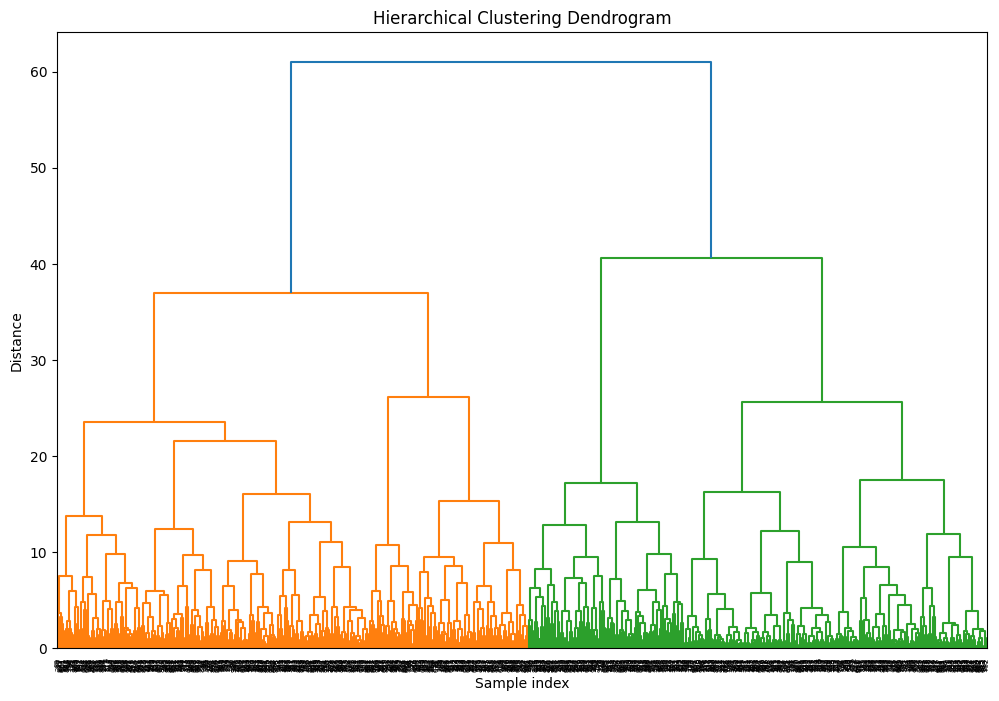

In [ ]:
# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

Based on dendrogram:
The largest vertical gap is near the top, just before the final merge.

If you draw a horizontal line at around distance = 40, it cuts the dendrogram into 2 big clusters (green and orange).

If you cut it at around distance = 30, you’d get 3–4 clusters, and going further down around 20 would give you 5–6 clusters.

**Selecting the clusters:**

2 clusters: If you're looking for broad grouping (coarse clusters).

4–6 clusters: If you want a more detailed segmentation.

In [ ]:
n_clusters_hierarchical = 4
hierarchical = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Add hierarchical clustering labels to the PCA DataFrame
pca_df['Hierarchical_Cluster'] = hierarchical_labels


In [ ]:
# Plot the hierarchical clusters on the PCA projection
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters_hierarchical):
    cluster_data = pca_df[pca_df['Hierarchical_Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.5)

plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Analyze the hierarchical clusters
cluster_analysis['Hierarchical_Cluster'] = hierarchical_labels
hierarchical_cluster_summary = cluster_analysis.groupby('Hierarchical_Cluster').mean()
print("\nHierarchical Clustering Analysis:")
print(hierarchical_cluster_summary[['Age', 'Annual_Premium', 'Response', 'Gender', 'Previously_Insured', 'Vehicle_Damage']])

In [ ]:

#---------------------------
# Comparison of clustering methods
#---------------------------

# Create a figure with subplots to compare the three clustering methods
plt.figure(figsize=(18, 6))

# K-means
plt.subplot(1, 3, 1)
for cluster in range(optimal_k):
    cluster_data = pca_df[pca_df['KMeans_Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.3)
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend()

# DBSCAN
plt.subplot(1, 3, 2)
noise = pca_df[pca_df['DBSCAN_Cluster'] == -1]
plt.scatter(noise['PC1'], noise['PC2'], color='gray', label='Noise', alpha=0.3, s=10)
for cluster in unique_clusters:
    cluster_data = pca_df[pca_df['DBSCAN_Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.grid(True)
plt.legend()

# Hierarchical
plt.subplot(1, 3, 3)
for cluster in range(n_clusters_hierarchical):
    cluster_data = pca_df[pca_df['Hierarchical_Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.3)
plt.title('Hierarchical Clustering')
plt.xlabel('PC1')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Calculate silhouette scores for each method to compare performance
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
# For DBSCAN, we need to exclude noise points (-1) for silhouette score
dbscan_no_noise_indices = dbscan_labels != -1
dbscan_silhouette = silhouette_score(X_scaled[dbscan_no_noise_indices],
                                     dbscan_labels[dbscan_no_noise_indices]) if n_clusters_dbscan > 1 else "N/A"
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)

print("\nClustering Algorithm Comparison:")
print(f"K-means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.4f}")